## todo:
* sqft_above    - Square footage of living area above ground. Check if this is  sqft_living - sqft_basement?)

# General EDA
EDA playround to start to find interesting things.

In [145]:
# Import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [146]:
df = pd.read_csv('../data/proc_kc_house_data.csv')
print(df.shape)
df.head(10)
len(df['id'].unique())

(21420, 27)


21420

# Processed Data Column Descriptions

* id            - Unique identifier for house
* date          - Date house was sold
* price         - Sales price of home - __this is the prediction target__
* bedrooms      - Number of bedrooms
* bathrooms     - Number of bathrooms
* sqft_living   - Square footage of living area
* sqft_lot      - Square footage of  lot
* floors        - # floors (levels) in house
* waterfront    - Number from 0 to 1 reflecting if house is categorized as a waterfront property - Categorical
* view          - Number from 0 to 4 reflecting quality of sceanic view - Categorical
* condition     - Number from 1 to 5 reflecting the overall condition of the property - Categorical
* grade         - Number from 1 to 13 refelecting the overall grade given to the property, based on King County grading system
* sqft_above    - Square footage of living area above ground/ (is this sqft_living - sqft_basement?) from basement
* sqft_basement - Square footage of the basement
* yr_built      - Year house was built
* yr_renovated  - Year house was renovated
* zipcode       - zip code
* lat           - Latitude coordinate
* long          - Longitude coordinate
* sqft_living15 - Average square footage of living area of the nearest 15 neighbors 
* sqft_lot15    - Average square footage of the  lots of the nearest 15 neighbors
* date_month    - ADDED month of sale date
* date_day      - ADDED day of sale date
* date_year     - ADDED year of sale date
* renovated_status      - ADDED Value Y/N/UNK refelecting the renovated status
* sqft_living15_diff    - ADDED difference between home living area and nearest neighbors average living area
* sqft_lot15_diff       - ADDED difference between home lot and nearest neighbors average lot  
    * Thanks to Data Science cohort members past and present for Data Column Descriptions

# Do basic data investigation
* Describe the data - mean, median, min, max
* Look for outliers

## General EDA Questions
### Are there any outliers in the dataset?


### 

In [147]:
df.describe()

id        price  bedrooms  bathrooms  sqft_living  \
count        21,420.00    21,420.00 21,420.00  21,420.00    21,420.00   
mean  4,580,939,869.16   541,861.43      3.37       2.12     2,083.13   
std   2,876,761,172.45   367,556.94      0.93       0.77       918.81   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,537,386.75   324,950.00      3.00       1.75     1,430.00   
50%   3,904,921,185.00   450,550.00      3.00       2.25     1,920.00   
75%   7,308,900,186.25   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition  ...   zipcode  \
count    21,420.00 21,420.00   21,420.00 21,420.00  21,420.00  ... 21,420.00   
mean     15,128.04      1.50        0.01      0.23       3.41  ... 98,077.87   
std      41,530.80      0.54        0.08      0.77       0.65  ...     53.48   
min         520.00      1.00        0.00      0.00       1.00  ... 98,001.00   
25%       5,040.00      1.00        0.00      0.00       3.00  ... 98,033.00   
50%       7,614.00      1.50        0.00      0.00       3.00  ... 98,065.00   
75%      10,690.50      2.00        0.00      0.00       4.00  ... 98,117.00   
max   1,651,359.00      3.50        1.00      4.00       5.00  ... 98,199.00   

            lat      long  sqft_living15  sqft_lot15  date_month  date_day  \
count 21,420.00 21,420.00      21,420.00   21,420.00   21,420.00 21,420.00   
mean      47.56   -122.21       1,988.38   12,775.72        6.56     15.69   
std        0.14      0.14         685.54   27,345.62        3.12      8.64   
min       47.16   -122.52         399.00      651.00        1.00      1.00   
25%       47.47   -122.33       1,490.00    5,100.00        4.00      8.00   
50%       47.57   -122.23       1,840.00    7,620.00        6.00     16.00   
75%       47.68   -122.12       2,370.00   10,086.25        9.00     23.00   
max       47.78   -121.31       6,210.00  871,200.00       12.00     31.00   

       date_year  sqft_living15_diff  sqft_lot15_diff  
count  21,420.00           21,420.00        21,420.00  
mean    2,014.33               94.75         2,352.32  
std         0.47              601.30        29,022.93  
min     2,014.00           -2,310.00      -326,879.00  
25%     2,014.00             -220.00          -420.25  
50%     2,014.00                0.00             0.00  
75%     2,015.00              310.00           680.00  
max     2,015.00            8,690.00     1,225,778.00  

[8 rows x 25 columns]

In [148]:
print('---- price -----')
print(df['price'].describe())        # that max is really huge! look for outliers
print('---- bedrooms -----')
print(df['bedrooms'].describe())        # that max is really huge! look for outliers
print('---- sqft_living -----')
print(df['sqft_living'].describe())     # that max is really huge! Look for outliers
print('---- sqft_above -----')
print(df['sqft_above'].describe())      # that max is really huge! Look for outliers
print('---- sqft_basement -----')
print(df['sqft_basement'].describe())   # that max is really huge! Look for outliers

---- price -----
count      21,420.00
mean      541,861.43
std       367,556.94
min        78,000.00
25%       324,950.00
50%       450,550.00
75%       645,000.00
max     7,700,000.00
Name: price, dtype: float64
---- bedrooms -----
count   21,420.00
mean         3.37
std          0.93
min          1.00
25%          3.00
50%          3.00
75%          4.00
max         33.00
Name: bedrooms, dtype: float64
---- sqft_living -----
count   21,420.00
mean     2,083.13
std        918.81
min        370.00
25%      1,430.00
50%      1,920.00
75%      2,550.00
max     13,540.00
Name: sqft_living, dtype: float64
---- sqft_above -----
count   21,420.00
mean     1,791.17
std        828.69
min        370.00
25%      1,200.00
50%      1,560.00
75%      2,220.00
max      9,410.00
Name: sqft_above, dtype: float64
---- sqft_basement -----
count   21,420.00
mean       285.94
std        440.01
min          0.00
25%          0.00
50%          0.00
75%        550.00
max      4,820.00
Name: sqft_basement, dt

In [149]:
print(df['sqft_living15'].describe())       # that max is really huge! Look for outliers
print(df['sqft_lot15'].describe())          # that max is MASSIVELY huge! Look for outliers
print(df['sqft_living15_diff'].describe())   # that max is really huge! Look for outliers
print(df['sqft_lot15_diff'].describe())      # that max is MASSIVELY huge! Look for outliers

count   21,420.00
mean     1,988.38
std        685.54
min        399.00
25%      1,490.00
50%      1,840.00
75%      2,370.00
max      6,210.00
Name: sqft_living15, dtype: float64
count    21,420.00
mean     12,775.72
std      27,345.62
min         651.00
25%       5,100.00
50%       7,620.00
75%      10,086.25
max     871,200.00
Name: sqft_lot15, dtype: float64
count   21,420.00
mean        94.75
std        601.30
min     -2,310.00
25%       -220.00
50%          0.00
75%        310.00
max      8,690.00
Name: sqft_living15_diff, dtype: float64
count      21,420.00
mean        2,352.32
std        29,022.93
min      -326,879.00
25%          -420.25
50%             0.00
75%           680.00
max     1,225,778.00
Name: sqft_lot15_diff, dtype: float64


In [150]:
print(df['bathrooms'].describe())    # that max seems large! look for outliers.
print(df['floors'].describe())       # that max seems large! look for outliers.

count   21,420.00
mean         2.12
std          0.77
min          0.50
25%          1.75
50%          2.25
75%          2.50
max          8.00
Name: bathrooms, dtype: float64
count   21,420.00
mean         1.50
std          0.54
min          1.00
25%          1.00
50%          1.50
75%          2.00
max          3.50
Name: floors, dtype: float64


# Framing questions from the POV of County government officals.  

Residential property tax assessors, county/city planning that want to learn about economic factors/data related to Residential property. Here are examples;
* Does my zip code price out residents? Ddoes the city/county need to work on making homes more affordable...are they already affordable?
* are lots too small/overcrowding/stressing infrastucture?  Are there differences in lot size between zip codes?
* are the homes good quality, newer, renovated if older. Are there differences between zip codes.
* for tax purposes what percentage of homes are being renovated? What types of homes are being renovated? 

## Group by zipcode and look at the differences in 1)sales price 2)sqft_living 3) sqft_lot 4)yr_built  5)anything else interesting.

In [151]:
zipcodes = df['zipcode'].unique()
np.sort(zipcodes)

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

In [152]:
df.groupby('zipcode')['id'].count()

zipcode
98001    358
98002    197
98003    276
98004    315
98005    168
        ... 
98177    254
98178    258
98188    135
98198    275
98199    316
Name: id, Length: 70, dtype: int64

In [153]:
df.groupby(['zipcode', 'date_year'])['id'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: id, Length: 140, dtype: int64

In [154]:
df.groupby(['zipcode', 'date_year'])['price'].mean()

zipcode  date_year
98001    2014        276,765.96
         2015        293,749.01
98002    2014        234,703.72
         2015        234,418.51
98003    2014        294,879.34
                        ...    
98188    2015        303,355.19
98198    2014        313,965.66
         2015        289,613.93
98199    2014        791,801.00
         2015        795,293.35
Name: price, Length: 140, dtype: float64

In [155]:
df.groupby(['zipcode', 'date_year'])['price'].median()

zipcode  date_year
98001    2014        255,000.00
         2015        277,500.00
98002    2014        234,500.00
         2015        235,000.00
98003    2014        263,750.00
                        ...    
98188    2015        265,000.00
98198    2014        265,000.00
         2015        272,475.00
98199    2014        696,000.00
         2015        680,000.00
Name: price, Length: 140, dtype: float64

In [156]:
df.groupby(['zipcode', 'date_year'])['price'].min()

zipcode  date_year
98001    2014        100,000.00
         2015        110,000.00
98002    2014        112,000.00
         2015         95,000.00
98003    2014        128,000.00
                        ...    
98188    2015        110,000.00
98198    2014         95,000.00
         2015         95,000.00
98199    2014        330,000.00
         2015        323,000.00
Name: price, Length: 140, dtype: float64

In [157]:
df.groupby(['zipcode', 'date_year'])['price'].max()

zipcode  date_year
98001    2014          850,000.00
         2015          639,900.00
98002    2014          367,500.00
         2015          389,000.00
98003    2014          950,000.00
                         ...     
98188    2015          707,000.00
98198    2014        1,350,000.00
         2015          770,000.00
98199    2014        3,200,000.00
         2015        2,800,000.00
Name: price, Length: 140, dtype: float64

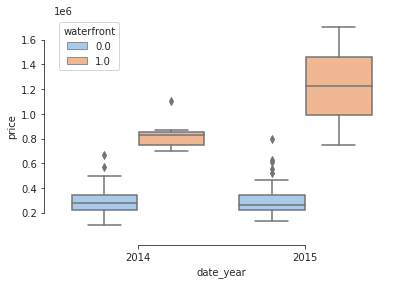

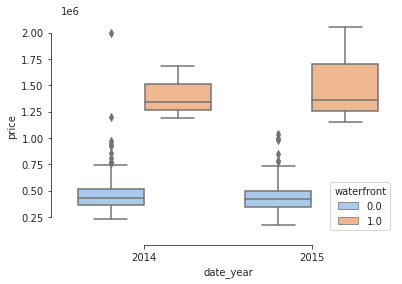

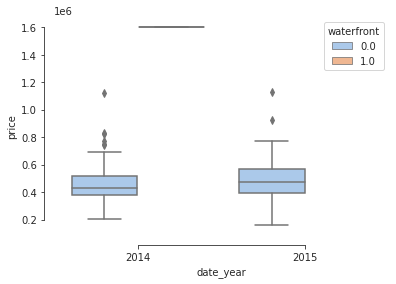

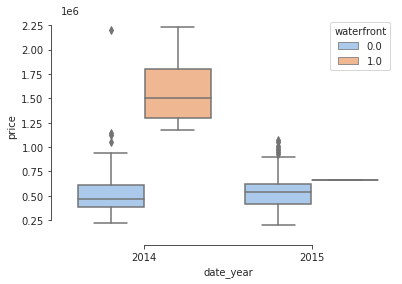

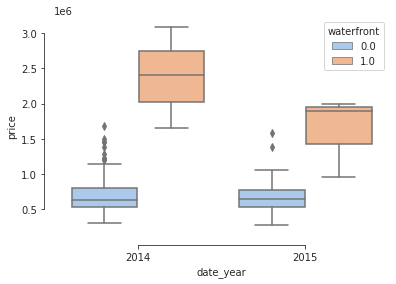

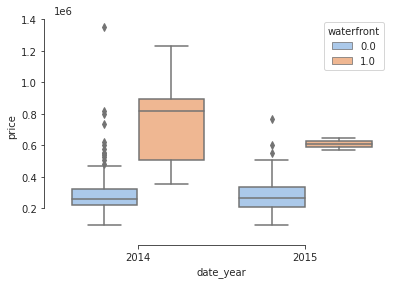

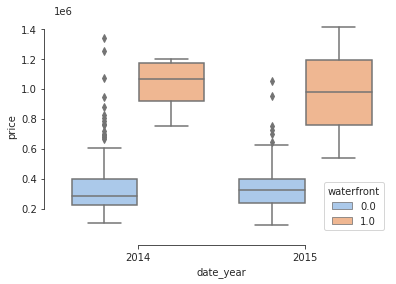

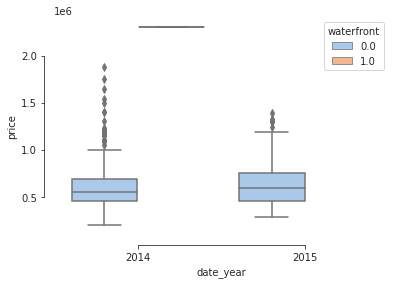

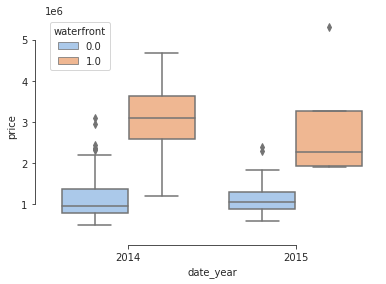

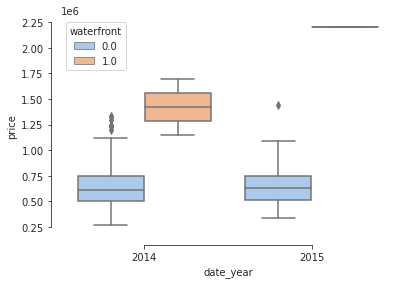

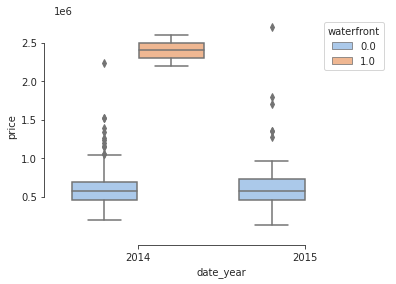

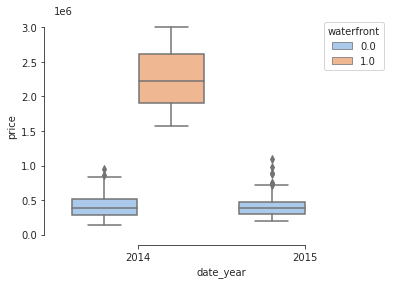

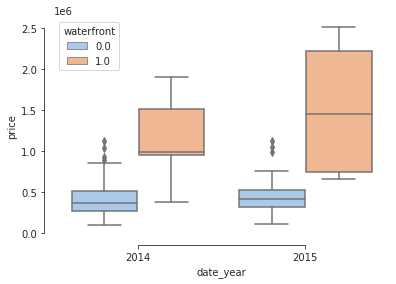

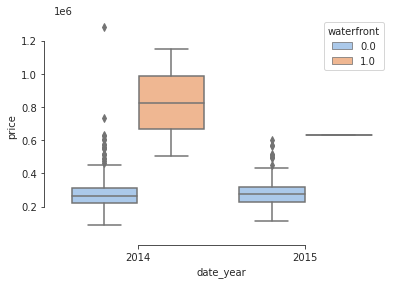

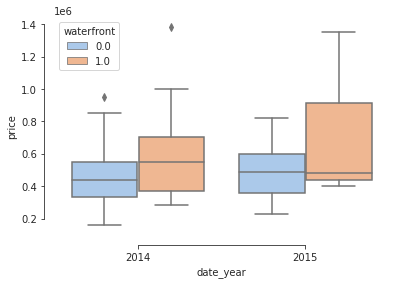

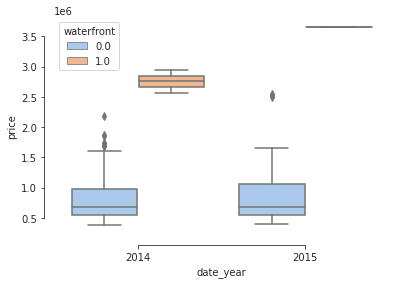

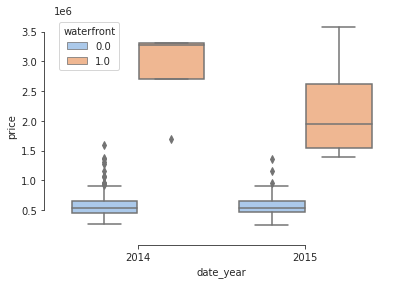

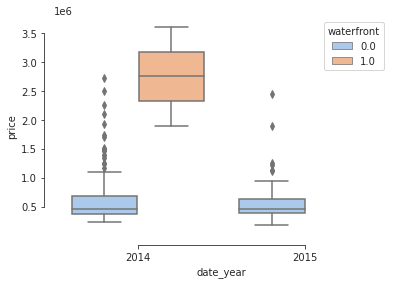

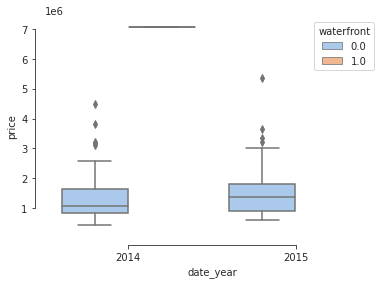

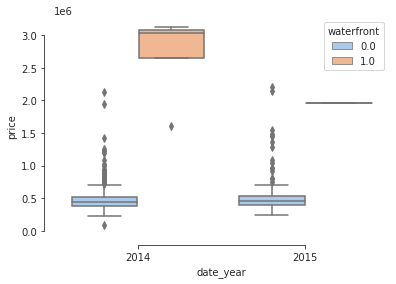

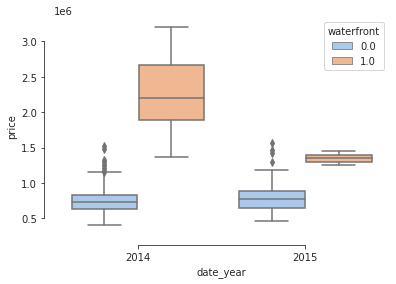

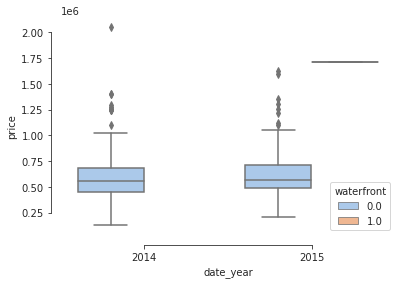

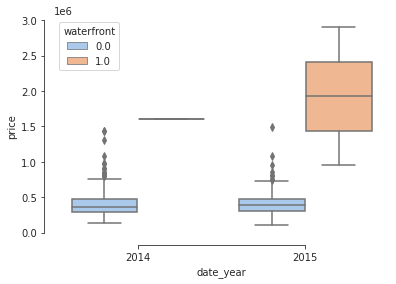

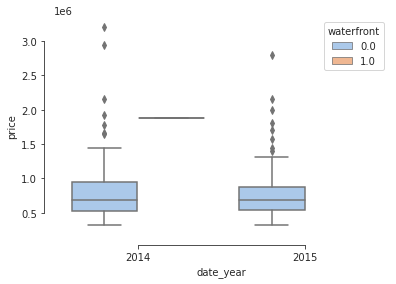

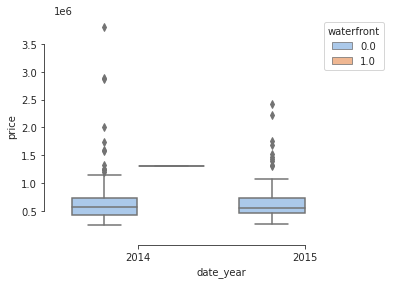

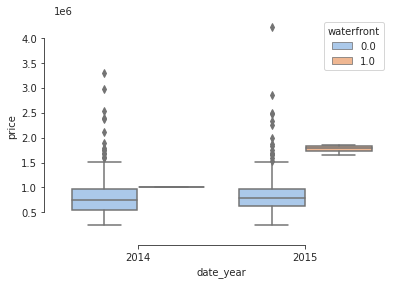

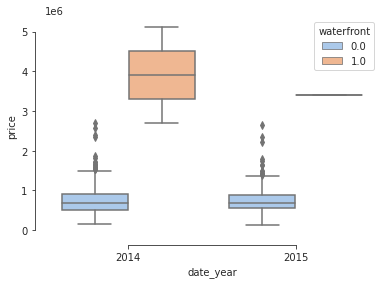

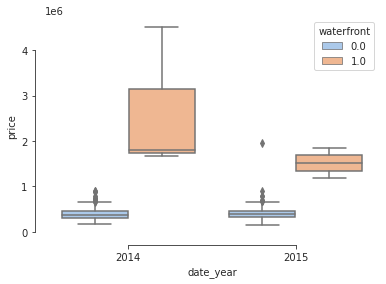

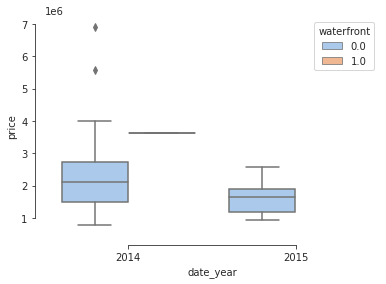

In [158]:

sns.set_style(style='ticks')
sns.set_palette(palette='pastel')

def plot_grouped_boxplot(plot_x, plot_y, plot_hue, plot_data):
    sns.boxplot(x=plot_x, y=plot_y, hue=plot_hue, data=plot_data)
    sns.despine(offset=10, trim=True)
    plt.show()


for zip in zipcodes:
    zipcode_df = df[(df['zipcode'] == zip)]
    if zipcode_df['waterfront'].max() == 1.0:
        plot_grouped_boxplot('date_year', 'price', 'waterfront', zipcode_df) 

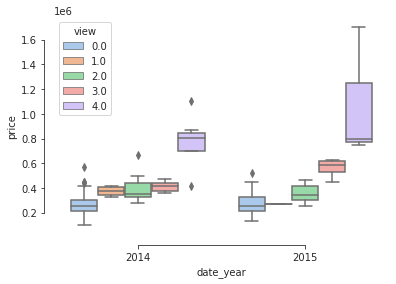

In [159]:
sns.boxplot(x="date_year", y="price",
            hue="view",
            data=df[df['zipcode']== 98178])
sns.despine(offset=10, trim=True)

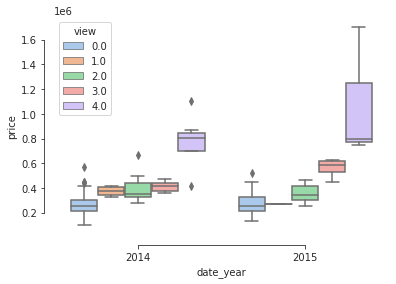

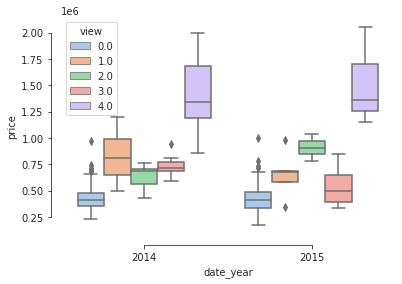

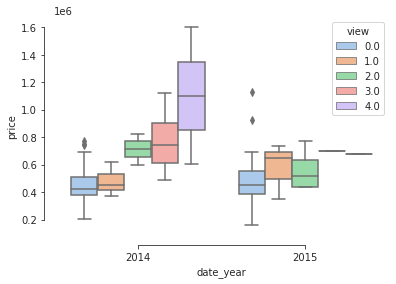

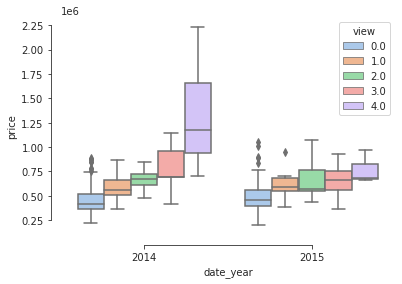

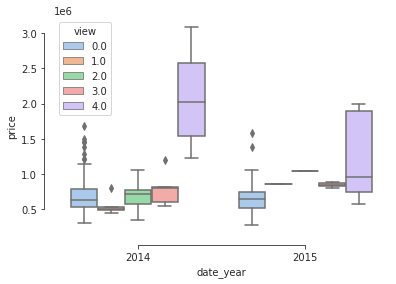

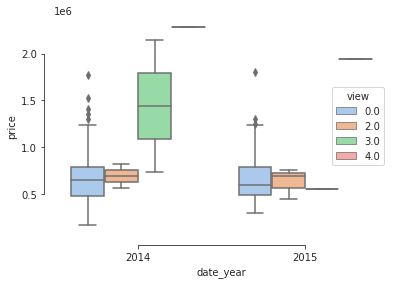

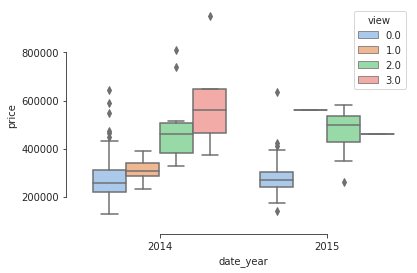

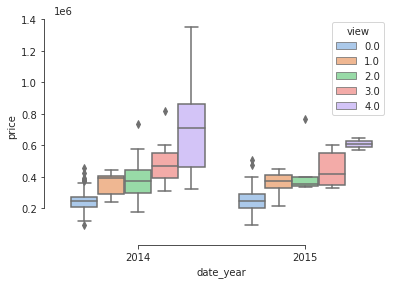

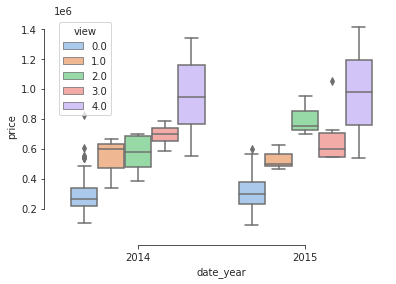

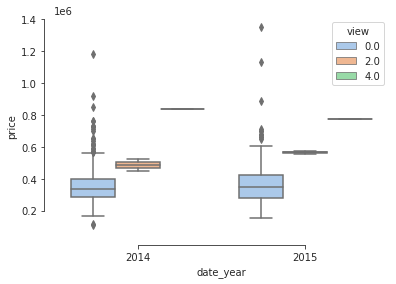

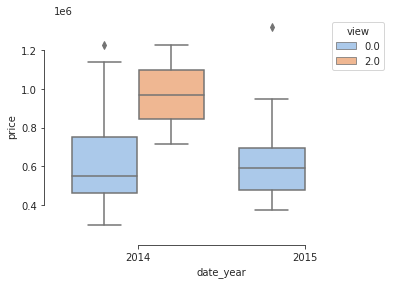

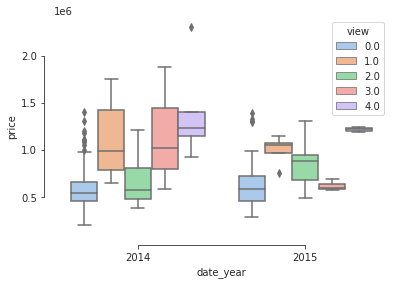

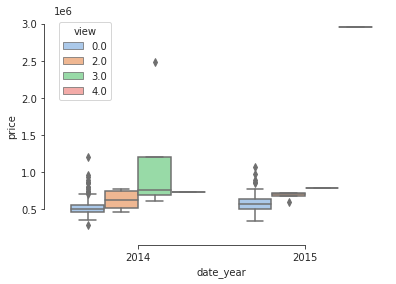

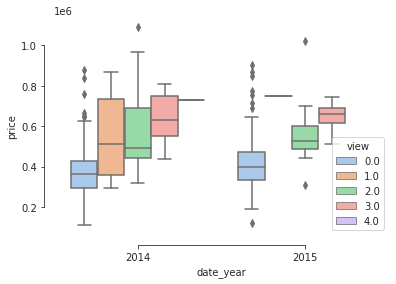

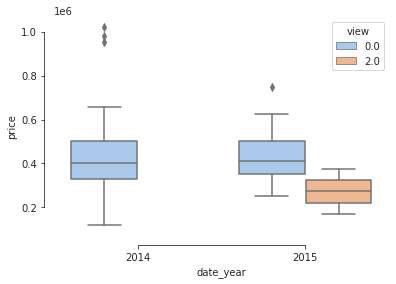

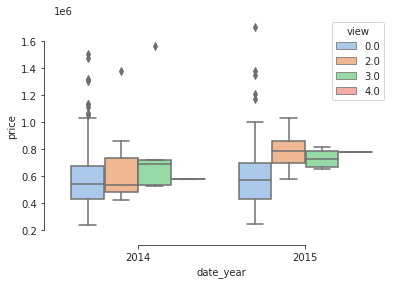

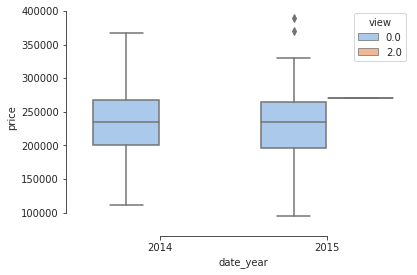

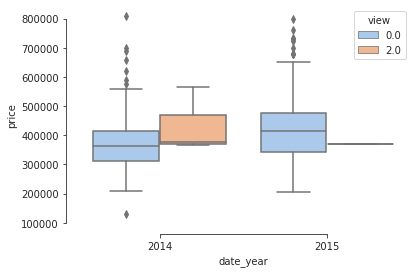

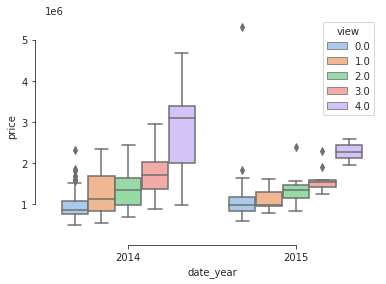

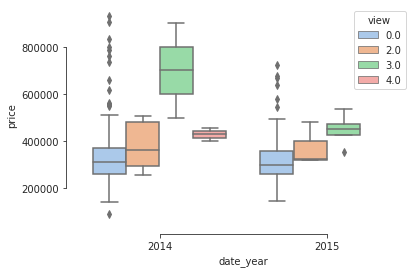

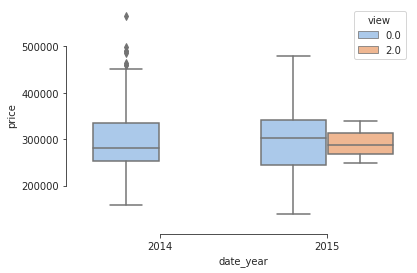

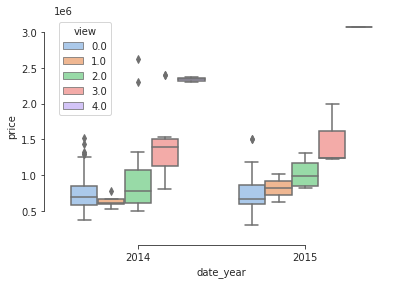

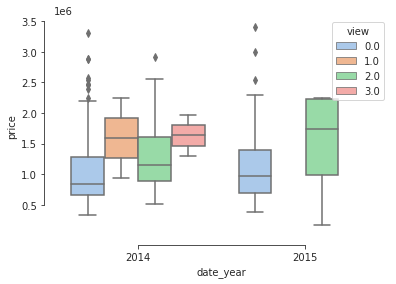

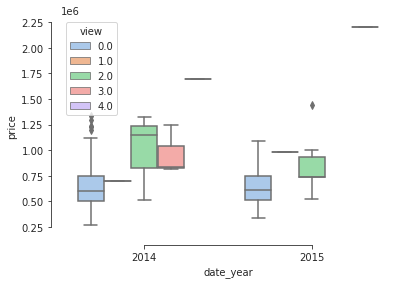

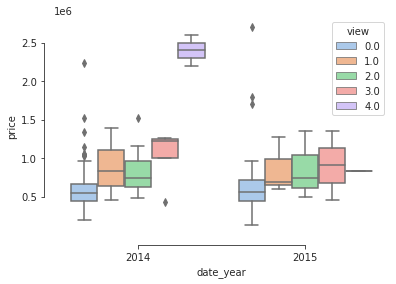

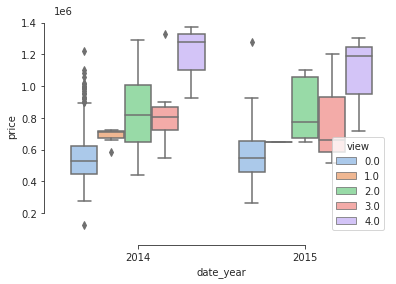

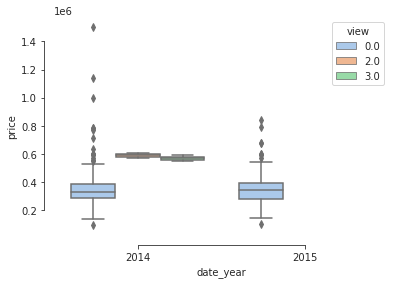

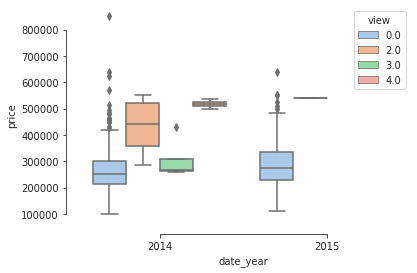

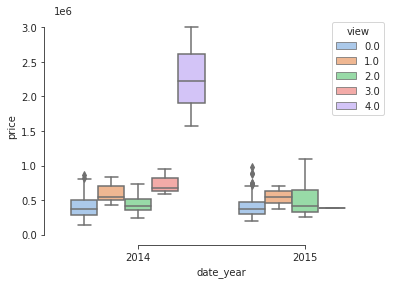

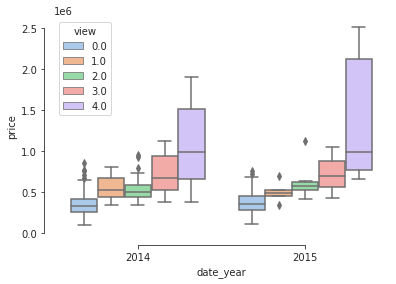

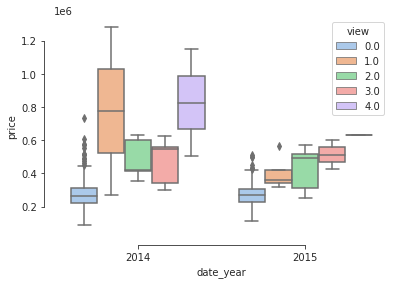

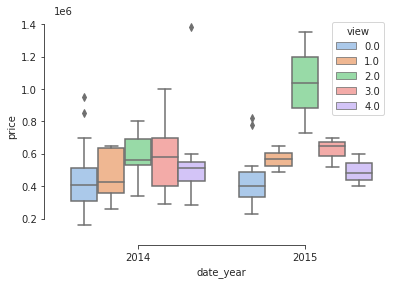

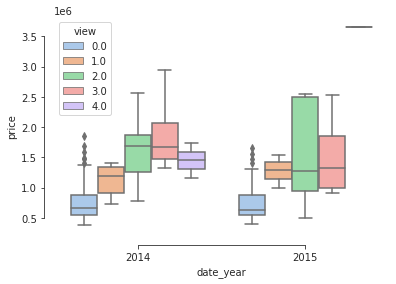

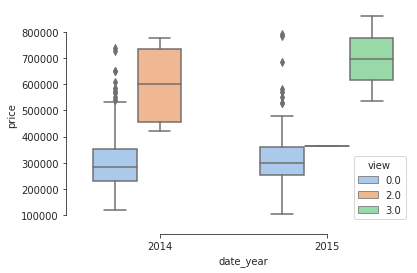

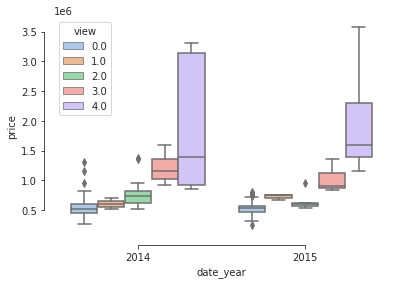

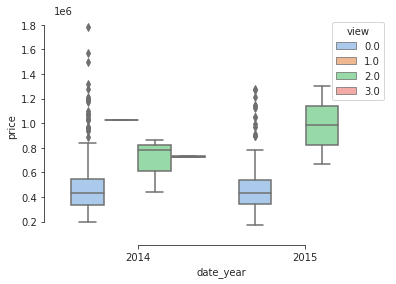

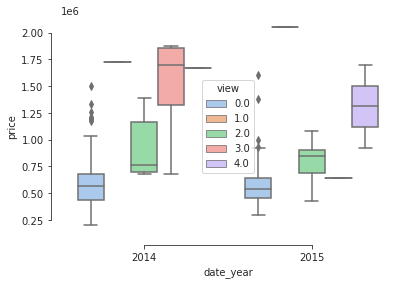

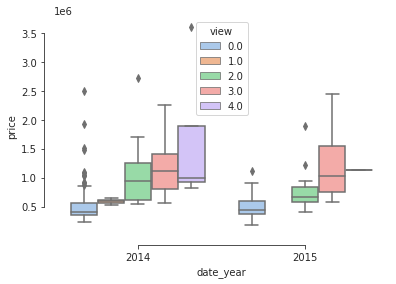

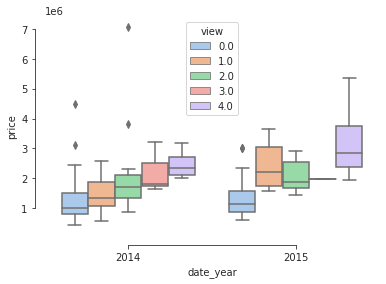

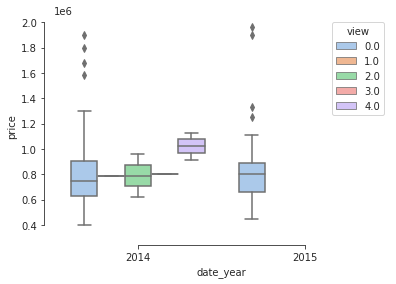

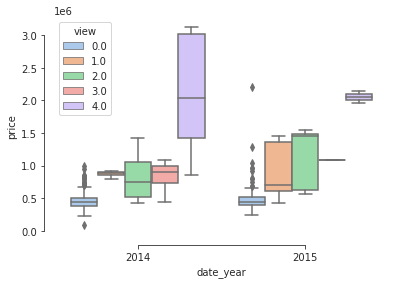

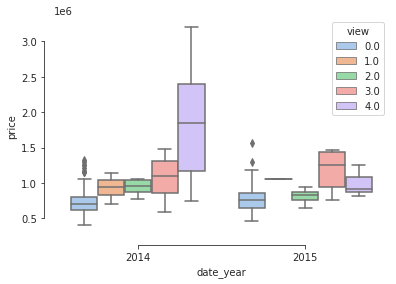

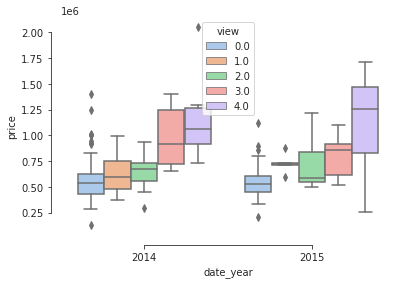

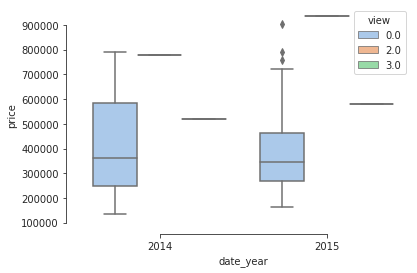

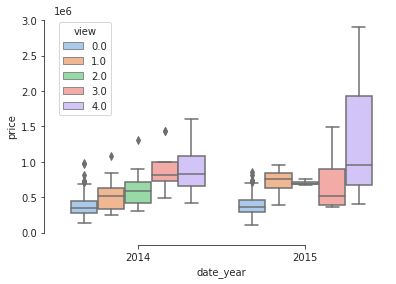

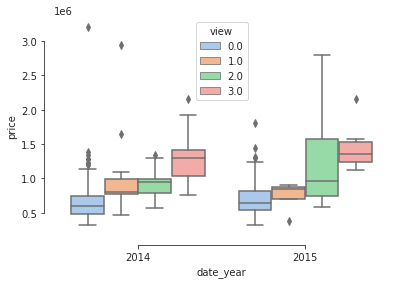

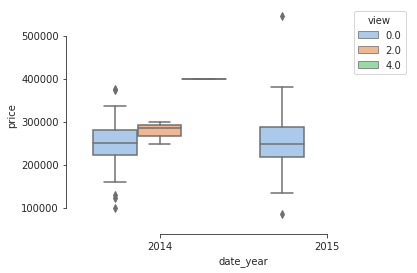

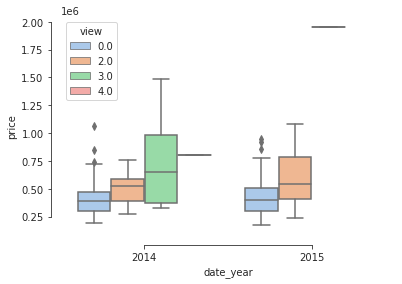

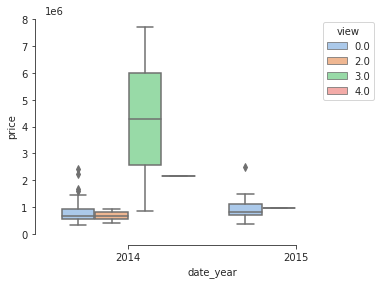

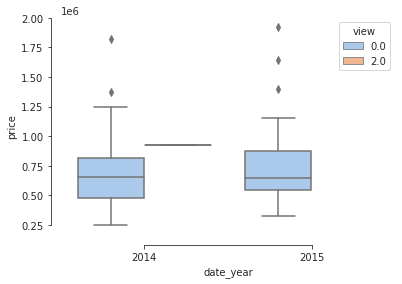

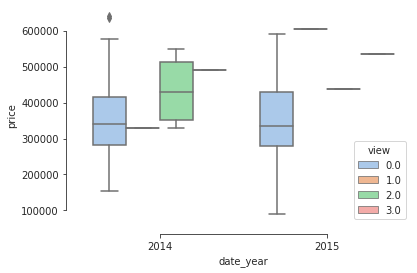

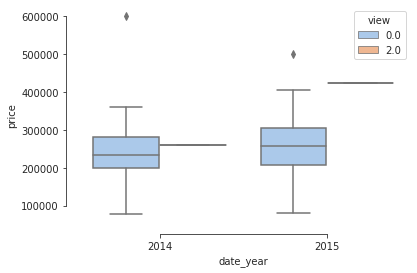

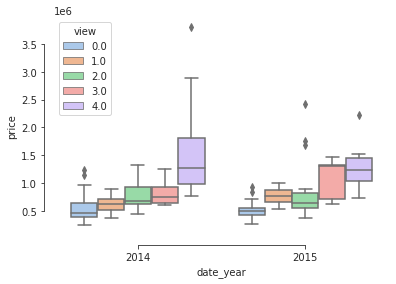

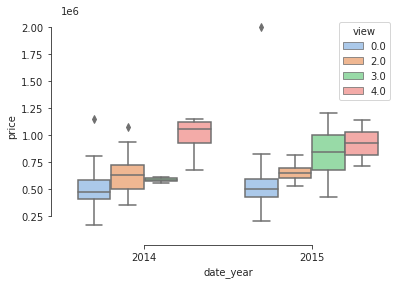

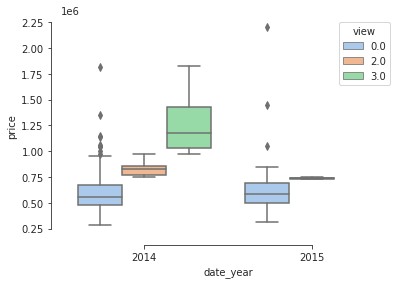

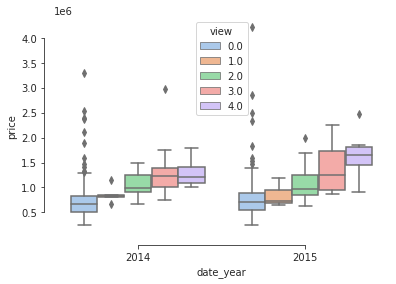

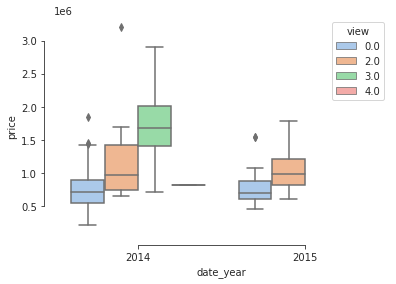

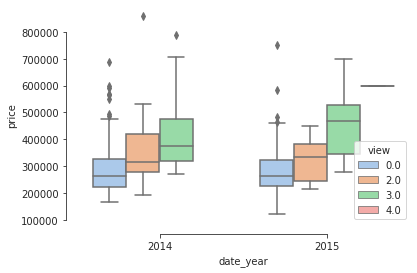

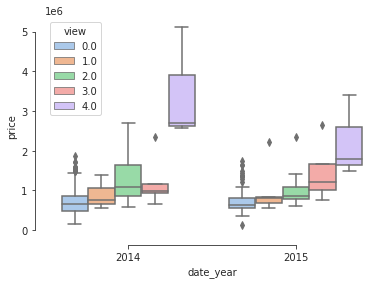

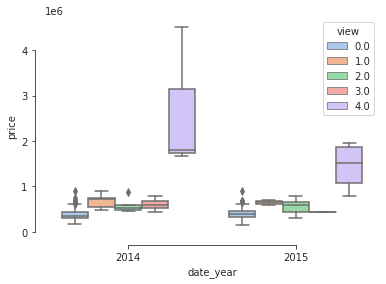

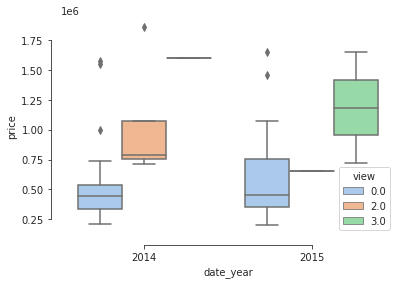

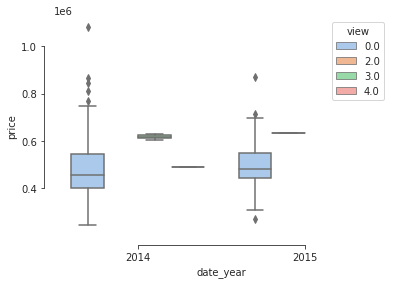

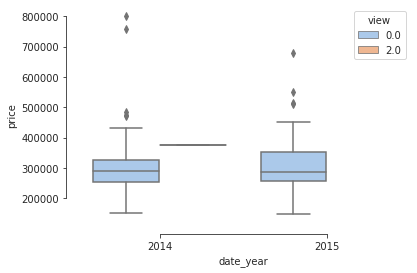

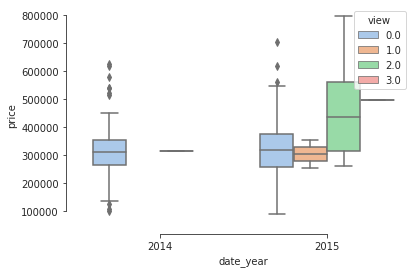

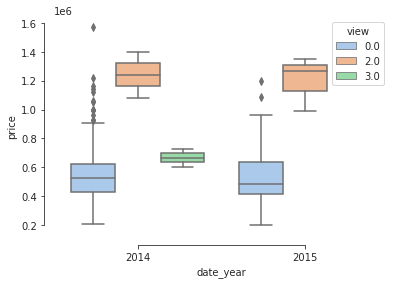

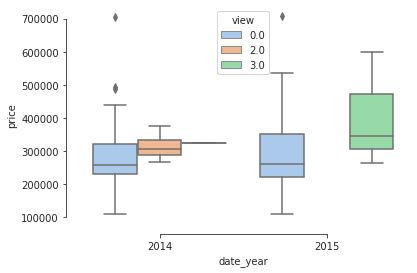

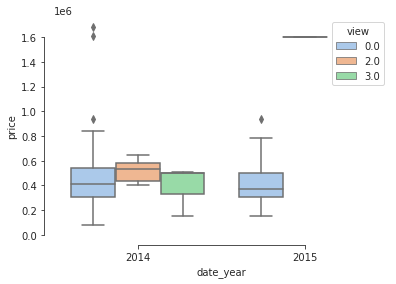

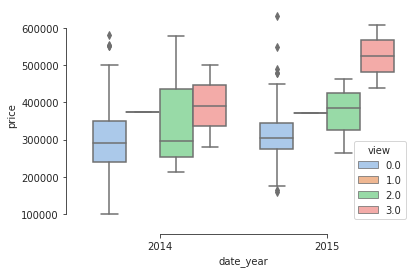

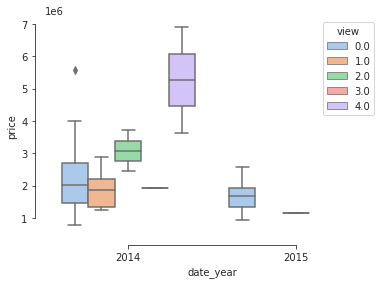

In [160]:
for zip in zipcodes:
    zipcode_df = df[(df['zipcode'] == zip)]
    if zipcode_df['view'].max() != zipcode_df['view'].min():
        plot_grouped_boxplot('date_year', 'price', 'view', zipcode_df) 

## What percentage of homes in the county are renovated? Consider breaking down by zipcode and year sold built

In [161]:
df.groupby(['zipcode', 'date_year'])['id'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: id, Length: 140, dtype: int64

In [162]:
df.groupby(['zipcode', 'date_year'])['view'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: view, Length: 140, dtype: int64

In [163]:
renovated_yes = df.loc[df['renovated_status']=='Y']
renovated_no_unk = df.loc[df['renovated_status']!='Y']

print(renovated_yes.groupby(['zipcode', 'date_year'])['id'].count())
print(renovated_no_unk.groupby(['zipcode', 'date_year'])['id'].count())

zipcode  date_year
98001    2014          1
         2015          3
98002    2014          4
         2015          1
98003    2014          1
                      ..
98188    2015          2
98198    2014          8
         2015          1
98199    2014         19
         2015          4
Name: id, Length: 127, dtype: int64
zipcode  date_year
98001    2014         241
         2015         113
98002    2014         126
         2015          66
98003    2014         179
                     ... 
98188    2015          51
98198    2014         169
         2015          97
98199    2014         194
         2015          99
Name: id, Length: 140, dtype: int64


## Exploring home living area and lot compared to neighbors 


In [164]:
print("--- df shape---")
print(df.shape)
print("--- no difference between home/lot and neighbors ---")
print(df[df['sqft_living15_diff'] == 0].shape)
print(df[df['sqft_lot15_diff'] == 0].shape)
print("---- home/lot LARGER than neighbors---")
print(df[df['sqft_living15_diff'] > 0].shape)
print(df[df['sqft_lot15_diff']>0].shape)
print("---- home/lot SMALLER than neighbors---")
print(df[df['sqft_living15_diff'] < 0].shape)
print(df[df['sqft_lot15_diff']<0].shape)

--- df shape---
(21420, 27)
--- no difference between home/lot and neighbors ---
(2541, 27)
(4436, 27)
---- home/lot LARGER than neighbors---
(9772, 27)
(8518, 27)
---- home/lot SMALLER than neighbors---
(9107, 27)
(8466, 27)


In [165]:

print("----renovated status UNK, N, Y---")
print(df[df['renovated_status'] == 'UNK'].shape)
print(df[df['renovated_status'] == 'N'].shape)
print(df[df['renovated_status'] == 'Y'].shape)


----renovated status UNK, N, Y---
(17099, 27)
(3581, 27)
(740, 27)
